In [116]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
renewable = pd.read_csv('data/2017-2021년_신재생에너지현황목록.csv', encoding='cp949')

In [118]:
renewable

,연도,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량
0,2017,태양광,강원,강릉시,124,18929.0,1560,"196,297.24"
1,2017,태양광,강원,고성군,100,22305.0,1560,"196,297.24"
2,2017,태양광,강원,동해시,26,2516.0,1560,"196,297.24"
3,2017,태양광,강원,삼척시,54,8493.0,1560,"196,297.24"
4,2017,태양광,강원,속초시,32,2859.0,1560,"196,297.24"
...,...,...,...,...,...,...,...,...
1520,2021,연료전지,전북,군산시,1,210.0,3,"1,260"
1521,2021,연료전지,전북,완주군,1,840.0,3,"1,260"
1522,2021,연료전지,전북,익산시,1,210.0,3,"1,260"
1523,2021,매립지가스(LFG),전남,목포시,1,998.0,1,998


In [119]:
renewable.dtypes.value_counts()

object     4
int64      3
float64    1
Name: count, dtype: int64

In [120]:
renewable.drop( columns= ['시도구분', '지역구분'], axis=1, inplace=True)

In [121]:
renewable['지역용량'] = renewable['지역용량'].str.replace(',','').astype(float)

In [122]:
renewable = renewable.groupby(['연도','발전원']).mean() ### 연도별 지역별 신재생에너지 전력생산량 평균

In [123]:
renewable.reset_index(inplace=True)
renewable

,연도,발전원,개수,용량,지역개수,지역용량
0,2017,매립지가스(LFG),1.000000,99.000000,1.000000,99.000000
1,2017,바이오,1.266667,540.333333,2.666667,1080.000000
2,2017,소수력,1.192308,241.769231,4.076923,947.730769
3,2017,연료전지,1.000000,430.000000,1.000000,430.000000
4,2017,태양광,112.062500,13170.462208,2004.770833,235791.647917
5,2017,폐기물,1.076923,445.384615,2.076923,777.230769
6,2017,풍력,1.000000,60.880000,1.400000,96.680000
7,2018,매립지가스(LFG),1.000000,99.000000,1.000000,99.000000
8,2018,바이오,1.250000,562.062500,3.000000,1226.375000
9,2018,소수력,1.178571,253.285714,4.678571,1147.107143


<AxesSubplot: xlabel='연도', ylabel='용량'>

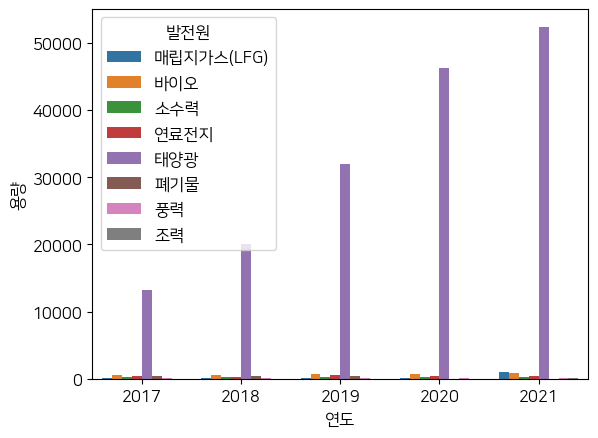

In [124]:
sns.barplot(x='연도', y='용량', 
            hue='발전원', data=renewable)

In [125]:
renewable2= renewable.copy()

In [126]:
renewable2.drop(renewable2[renewable2['발전원'] == '태양광'].index, inplace=True)

<AxesSubplot: xlabel='연도', ylabel='용량'>

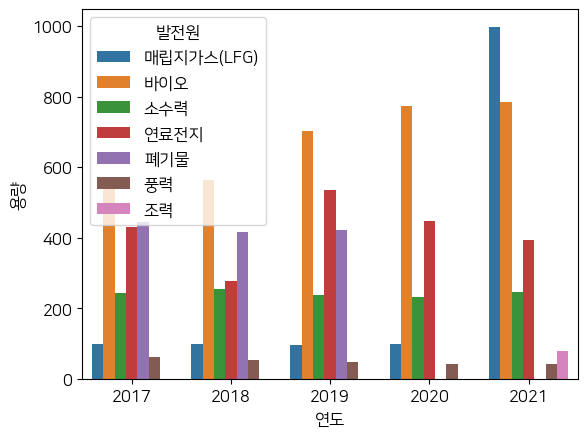

In [127]:
sns.barplot(x='연도', y='용량', 
            hue='발전원', data=renewable2)